In [95]:
# import the packeages that I will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

In [96]:
# reading the csv file
data = pd.read_csv('data/kc_house_data.csv')
# previewing the DataFrame
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [97]:
# getting info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [98]:
data.shape

(21597, 21)

In [99]:
# Chaning the date data type from object to datetime
data.date = pd.to_datetime(data['date'])
# Creating a new column 'sold_year' 
data['sold_year'] = data['date'].dt.year
# Calculating the age of the each house when they were sold
data['house_age'] = data['sold_year'] - data['yr_built']

In [100]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year,house_age
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,43.323286
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,29.377285
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,-1.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,18.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,40.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,63.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000


In [101]:
## Data Cleaning 
# 1. Looking at objects(strings), confirm that this data is supposed to be encoded as strings

In [102]:
# The data type of sqft_basement is object. Apparently sqft_basement is numeric data, 
# so we can conclude that numeric data sqft_basement was wrongly encoded as strings.

In [103]:
data.sqft_basement.value_counts()
# 454 notknown data encoded as string "?"

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2500.0        1
172.0         1
946.0         1
2196.0        1
2580.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [104]:
#replacing "?" by "0" and changing datatype to numeric data
data.sqft_basement = data.sqft_basement.str.replace('?','0').astype('float')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [106]:
## 2. Detecting and Dealing with NULL Values

In [107]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
yr_renovated,3842,17.789508
waterfront,2376,11.001528
view,63,0.291707
house_age,0,0.000000
condition,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000


In [108]:
Null_val_col = ['waterfront', 'view', 'yr_renovated']

In [109]:
for col in Null_val_col:
    print(data[col].unique())
    print(data[col].nunique())

[nan 'NO' 'YES']
2
['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
5
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
70


In [110]:
for col in Null_val_col:
    print(data[col].value_counts())

NO     19075
YES      146
Name: waterfront, dtype: int64
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [111]:
#For categorical data, I choose to fill the most frequent data
def fillna(col):
    col.fillna(col.value_counts().index[0],inplace = True)
    return col
data[Null_val_col] = data[Null_val_col].apply(lambda col:fillna(col))

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [113]:
# Drop columns that I dont need
data.drop(columns = ['id','date','sold_year','yr_built'],inplace = True)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  house_

In [115]:
## 1. Finding Correlation between various features and the target variable


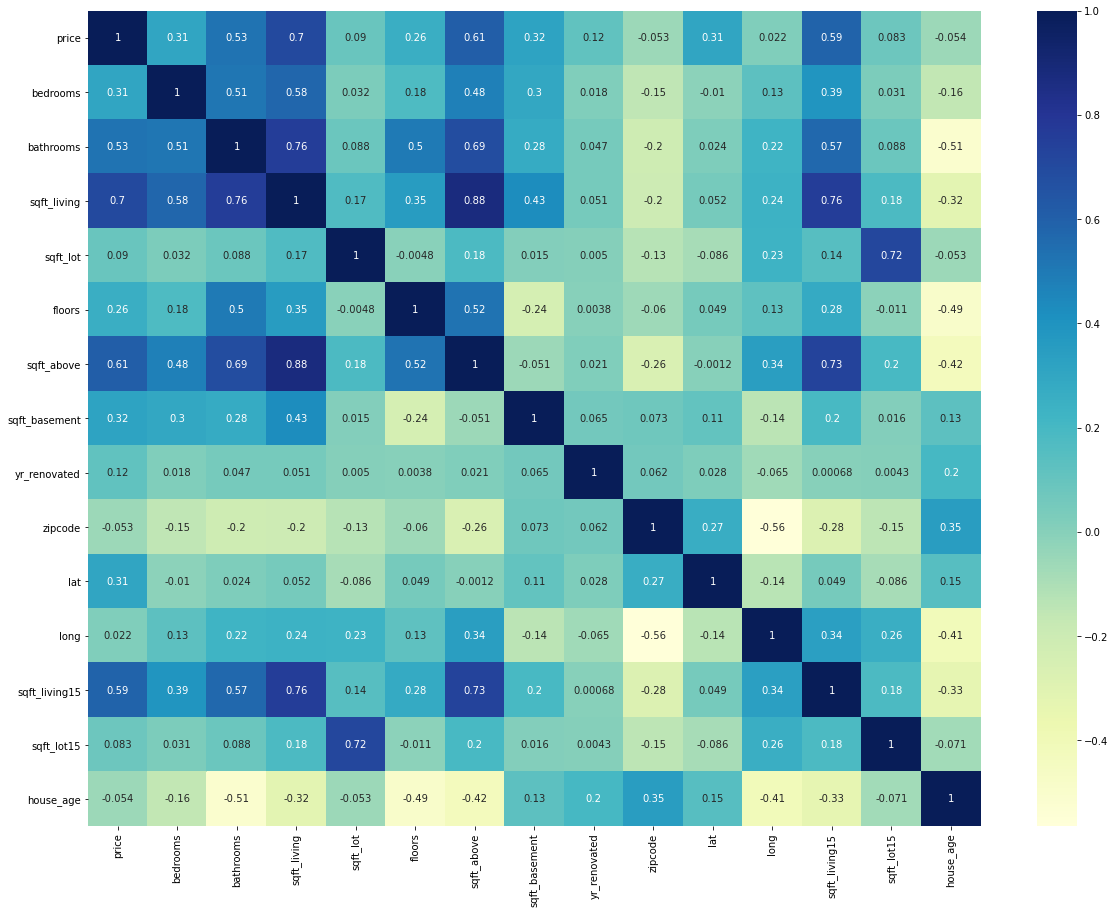

In [116]:
corr = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.savefig('Heatmap')

In [117]:
corr['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
long             0.022036
zipcode         -0.053402
house_age       -0.053890
Name: price, dtype: float64

In [118]:
## 2. Use 'stack' and a subset to return only the hightly correlated pairs for features.


In [119]:
data_features = data.drop('price', axis = 1)
corr_features = data_features.corr()
a = corr_features.abs().stack().reset_index().sort_values(0,ascending = False)
a['pairs'] = list(zip(a.level_0, a.level_1))
a.drop(columns=['level_1', 'level_0'], inplace = True)
a.set_index(['pairs'],inplace = True)
a.columns = ['cc']
a.drop_duplicates(inplace = True)
a[(a.cc>0.75) & (a.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(bathrooms, sqft_living)",0.755758


In [120]:
data.drop(columns = ['sqft_above'],inplace = True)

In [121]:
## 3. Explore Categorical Data

In [122]:
#Convert "yr_renovated" to dichotomous variables
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [123]:
data.drop('yr_renovated', axis = 1, inplace = True)

In [124]:
#Convert "sqft_basement" to dichotomous variables
data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [125]:
data.drop('sqft_basement', axis = 1, inplace = True)

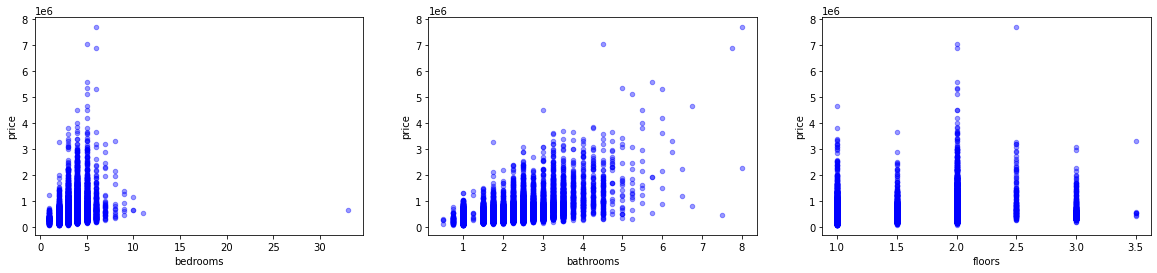

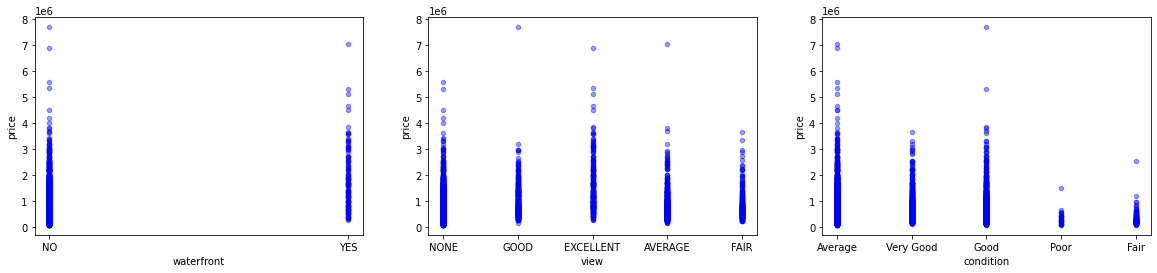

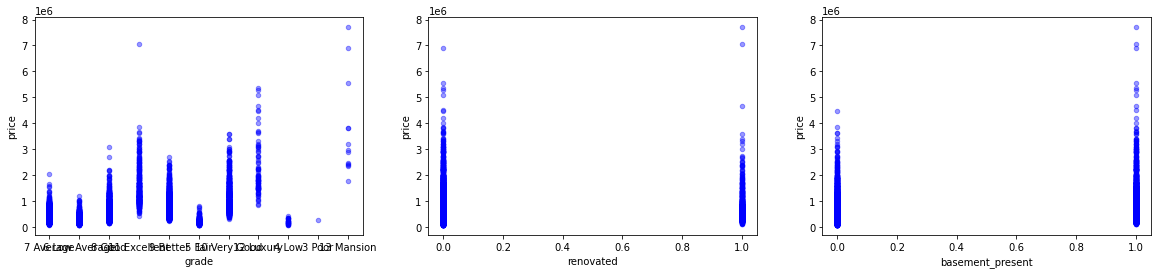

In [126]:
#Identify categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
for xcol, ax in zip(['bedrooms','bathrooms','floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
for xcol, ax in zip(['waterfront','view','condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
for xcol, ax in zip(['grade','renovated','basement_present'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

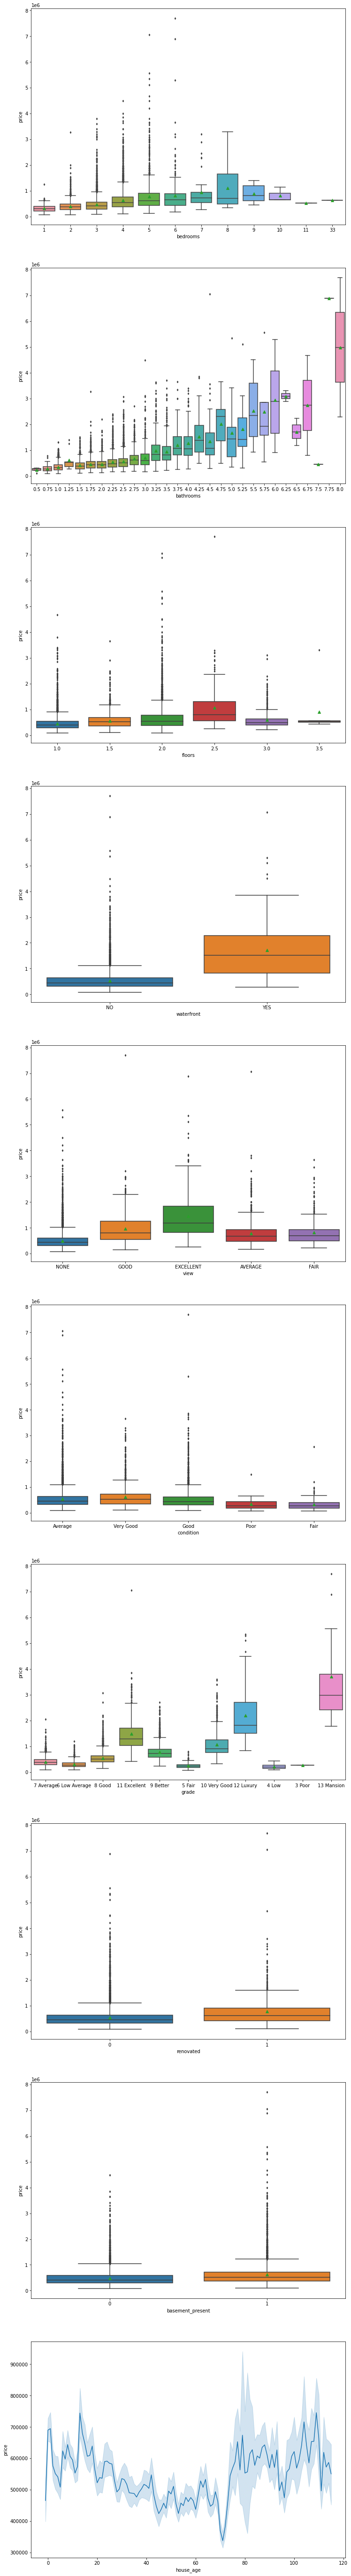

In [127]:
cat_feat = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','renovated','basement_present','house_age','lat','long','zipcode']
fig,ax = plt.subplots(10, figsize=(12,100))
sns.boxplot(x = 'bedrooms', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[0])
sns.boxplot(x = 'bathrooms', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[1])
sns.boxplot(x = 'floors', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[2])
sns.boxplot(x = 'waterfront', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[3])
sns.boxplot(x = 'view', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[4])
sns.boxplot(x = 'condition', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[5])
sns.boxplot(x = 'grade', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[6])
sns.boxplot(x = 'renovated', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[7])
sns.boxplot(x = 'basement_present', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[8])
#Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval
sns.lineplot(x = 'house_age', y = 'price', data = data, ax = ax[9])
plt.show()

In [128]:
data[data.bedrooms== 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated,basement_present
15856,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,98103,47.6878,-122.331,1330,4700,67,0,1


In [129]:
data['bedrooms'].iloc[15856] = 3

In [130]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated,basement_present
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,98178,47.5112,-122.257,1340,5650,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,98125,47.7210,-122.319,1690,7639,63,1,1
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,98028,47.7379,-122.233,2720,8062,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,98136,47.5208,-122.393,1360,5000,49,0,1
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,98074,47.6168,-122.045,1800,7503,28,0,0


In [131]:
## 4. Explore Continous Data

In [132]:
data_1 = data

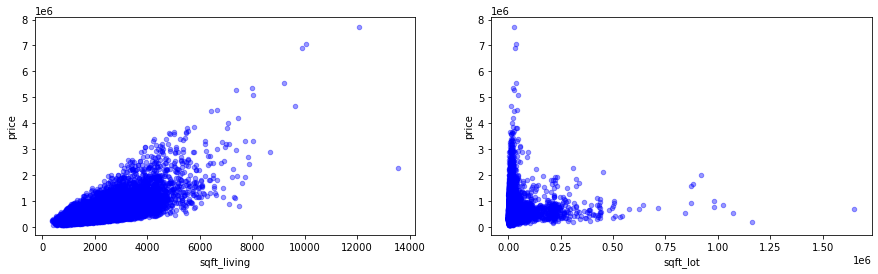

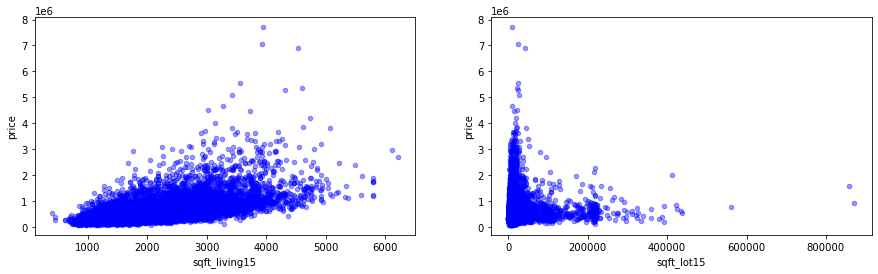

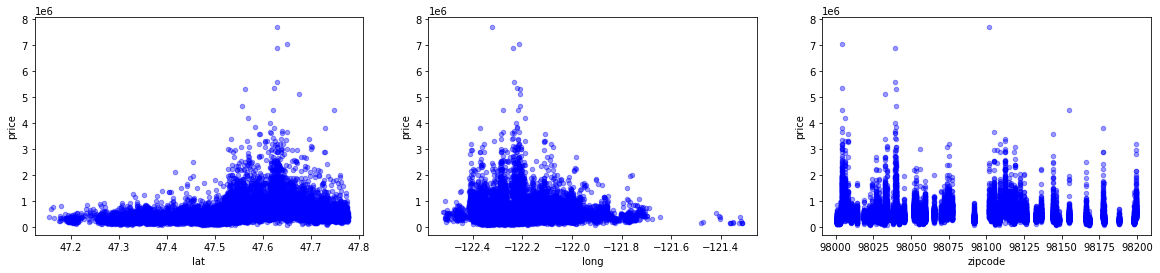

In [133]:
#Identify continous data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
for xcol, ax in zip(['sqft_living','sqft_lot'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
for xcol, ax in zip(['sqft_living15','sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))    
for xcol, ax in zip(['lat','long','zipcode'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

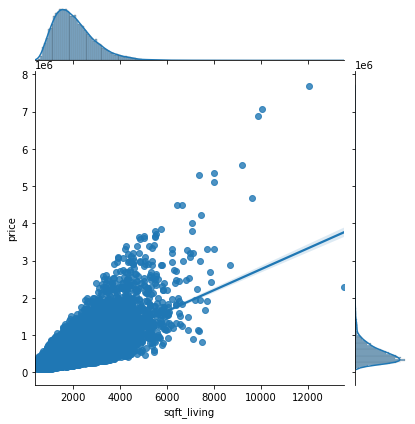

In [134]:
sns.jointplot(x = data['sqft_living'],y= data['price'], data = data, kind = 'reg')
plt.savefig('Joinplot_sqft_living_vs_Price')

In [135]:
cont_target_feature = ['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','lat','long','zipcode']
cont_feature = ['sqft_living','sqft_lot','sqft_living15','sqft_lot15','lat','long','zipcode']

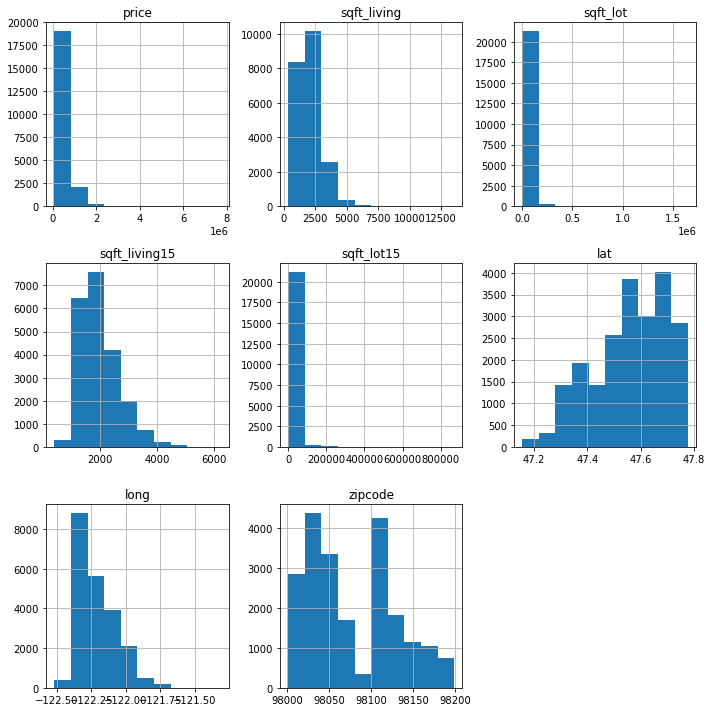

In [136]:
data_1[cont_target_feature].hist(figsize = (10,10))
plt.tight_layout();

In [137]:
data_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated,basement_present
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,98178,47.5112,-122.257,1340,5650,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,98125,47.7210,-122.319,1690,7639,63,1,1
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,98028,47.7379,-122.233,2720,8062,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,98136,47.5208,-122.393,1360,5000,49,0,1
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,98074,47.6168,-122.045,1800,7503,28,0,0


In [138]:
data_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated,basement_present
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,43.323286,0.034449,0.38510
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,53.513072,0.138552,0.140724,685.230472,27274.441950,29.377285,0.182384,0.48663
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,0.000000,0.00000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000,0.000000,0.00000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000,0.000000,0.00000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000,0.000000,1.00000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,1.000000,1.00000


In [139]:
## Data Feature Engineering
#1. Dealing with Categorical Varoables - Creating Dummy Variables

In [140]:
categorical_cols = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','renovated','basement_present']

In [141]:
bd_dummies = pd.get_dummies(data_1['bedrooms'], prefix='bd', drop_first=True)
bth_dummies = pd.get_dummies(data_1['bathrooms'], prefix='bth', drop_first=True)
fl_dummies = pd.get_dummies(data_1['floors'], prefix='fl', drop_first=True)
wf_dummies = pd.get_dummies(data_1['waterfront'], prefix='wf', drop_first=True)
vw_dummies = pd.get_dummies(data_1['view'], prefix='vw', drop_first=True)
con_dummies = pd.get_dummies(data_1['condition'], prefix='con', drop_first=True)
gd_dummies = pd.get_dummies(data_1['grade'], prefix='gd', drop_first=True)
rn_dummies = pd.get_dummies(data_1['renovated'], prefix='rn', drop_first=True)
bs_dummies = pd.get_dummies(data_1['basement_present'], prefix='bs', drop_first=True)
data_2 = data_1.drop(['bedrooms','bathrooms','floors','waterfront','view','condition','grade','renovated','basement_present'],axis = 1)
data_3 = data_2.join([bd_dummies,bth_dummies,fl_dummies,wf_dummies,vw_dummies,con_dummies,gd_dummies,rn_dummies,bs_dummies])
data_3.head()

,price,sqft_living,sqft_lot,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,bd_2,...,gd_13 Mansion,gd_3 Poor,gd_4 Low,gd_5 Fair,gd_6 Low Average,gd_7 Average,gd_8 Good,gd_9 Better,rn_1,bs_1
0,221900.0,1180,5650,98178,47.5112,-122.257,1340,5650,59,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,2570,7242,98125,47.7210,-122.319,1690,7639,63,0,...,0,0,0,0,0,1,0,0,1,1
2,180000.0,770,10000,98028,47.7379,-122.233,2720,8062,82,1,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,1960,5000,98136,47.5208,-122.393,1360,5000,49,0,...,0,0,0,0,0,1,0,0,0,1
4,510000.0,1680,8080,98074,47.6168,-122.045,1800,7503,28,0,...,0,0,0,0,0,0,1,0,0,0


In [142]:
## Model Testing
# Model 1

In [143]:
feature_cols = data_3.columns[1:]

In [144]:
feature_cols

Index(['sqft_living', 'sqft_lot', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'house_age', 'bd_2', 'bd_3', 'bd_4', 'bd_5', 'bd_6',
       'bd_7', 'bd_8', 'bd_9', 'bd_10', 'bd_11', 'bth_0.75', 'bth_1.0',
       'bth_1.25', 'bth_1.5', 'bth_1.75', 'bth_2.0', 'bth_2.25', 'bth_2.5',
       'bth_2.75', 'bth_3.0', 'bth_3.25', 'bth_3.5', 'bth_3.75', 'bth_4.0',
       'bth_4.25', 'bth_4.5', 'bth_4.75', 'bth_5.0', 'bth_5.25', 'bth_5.5',
       'bth_5.75', 'bth_6.0', 'bth_6.25', 'bth_6.5', 'bth_6.75', 'bth_7.5',
       'bth_7.75', 'bth_8.0', 'fl_1.5', 'fl_2.0', 'fl_2.5', 'fl_3.0', 'fl_3.5',
       'wf_YES', 'vw_EXCELLENT', 'vw_FAIR', 'vw_GOOD', 'vw_NONE', 'con_Fair',
       'con_Good', 'con_Poor', 'con_Very Good', 'gd_11 Excellent',
       'gd_12 Luxury', 'gd_13 Mansion', 'gd_3 Poor', 'gd_4 Low', 'gd_5 Fair',
       'gd_6 Low Average', 'gd_7 Average', 'gd_8 Good', 'gd_9 Better', 'rn_1',
       'bs_1'],
      dtype='object')

In [145]:
X = data_3[feature_cols]

Skewness: 4.023365
Kurtosis: 34.541359


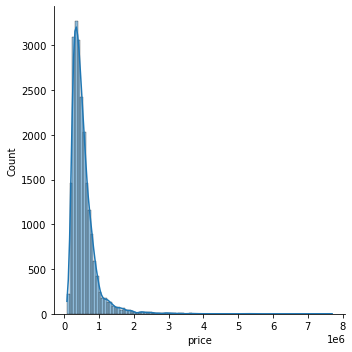

In [146]:
print("Skewness: %f" % data_3['price'].skew())
print("Kurtosis: %f" % data_3['price'].kurt())
sns.displot(data_3['price'], bins=100,kde = True);

In [147]:
#Comments
y = np.log(data_3['price'])

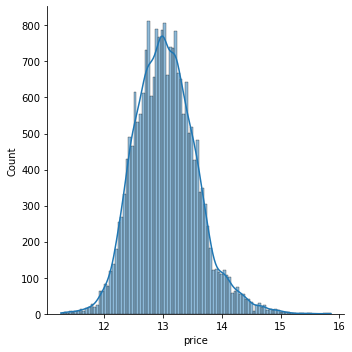

In [148]:
sns.displot(y, bins=100,kde = True);

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [150]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17277, 72), (17277,), (4320, 72), (4320,))

In [151]:
linreg = LinearRegression()
model_1 = linreg.fit(X_train, y_train)
y_hat_train = model_1.predict(X_train)
y_hat_test = model_1.predict(X_test)

In [152]:
print(linreg.intercept_)
print(linreg.coef_)
print(zip(feature_cols, linreg.coef_))

-1.0976082364829658
[ 1.49986121e-04  4.79892138e-07 -7.15548286e-04  1.37201255e+00
 -1.52711797e-01  9.49268426e-05 -2.47507737e-07  3.53010295e-03
  5.20402575e-02  7.87283922e-03 -4.15719535e-03 -2.25939413e-02
 -7.64928442e-02 -1.04695136e-01 -8.84587559e-02 -8.58011782e-02
 -4.17260011e-02 -7.62324093e-11  4.30566893e-02  4.06675754e-02
  1.96161984e-01  6.74723763e-02  1.11769778e-01  1.32591915e-01
  1.22986631e-01  1.43161785e-01  1.57643679e-01  1.76898347e-01
  2.14144703e-01  2.20679981e-01  2.89610671e-01  2.40692877e-01
  2.77077901e-01  2.19855283e-01  3.32612243e-01  3.28382727e-01
  3.26023814e-01  3.03513570e-01  1.16634725e-01  9.83751585e-01
  1.13454134e-01  3.44396168e-01 -5.71093150e-01  1.43791710e-01
  4.67595493e-01 -5.98274001e-01  7.09764619e-02  7.37755101e-02
  1.40576619e-01  1.48267326e-01  1.74440993e-01  3.74446013e-01
  1.60721790e-01  4.71584741e-02  5.22461145e-02 -1.15771056e-01
 -1.31235122e-01  5.16583559e-02 -1.37694945e-01  1.09717922e-01
  7.5

In [153]:
r2_score_train = r2_score(y_train, y_hat_train)
r2_score_train

0.777975343206772

In [154]:
r2_score_test = r2_score(y_test, y_hat_test)
r2_score_train

0.777975343206772

In [155]:
# K-fold cross evaluation #Different 
mse = make_scorer(mean_squared_error)
cv_5_results  = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=5,  scoring=mse)))
cv_10_results = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=10,  scoring=mse)))
cv_20_results = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=20,  scoring=mse)))
cv_5_results,cv_10_results,cv_20_results

(0.2500988650081006, 0.25014466160346455, 0.2500627651096183)

In [156]:
#Calcualte RMSE for train dataset and test dataset
train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root of Mean Squared Error:', train_mse)
print('Test Root of Mean Squared Error:', test_mse)

Train Root of Mean Squared Error: 0.2482680942462599
Test Root of Mean Squared Error: 0.2538084454658363


In [157]:
import statsmodels.api as sm
predictors = X_train
predictors_int = sm.add_constant(predictors)
model = sm.OLS(y_train,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     849.1
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:42:23   Log-Likelihood:                -443.89
No. Observations:               17277   AIC:                             1032.
Df Residuals:                   17205   BIC:                             1590.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0976      4.074     -0.269      0.788      -9.083       6.887
sqft_living          0.0001   5.04e-06     29.777      0.000       0.000       0.000
sqft_lot          4.799e-07   6.84e-08      7.017      0.000    3.46e-07    6.14e-07
zipcode             -0.0007   4.61e-05    -15.515      0.000      -0.001      -0.001
lat                  1.3720      0.015     91.034      0.000       1.342       1.402
long                -0.1527      0.018     -8.274      0.000      -0.189      -0.117
sqft_living15     9.493e-05   4.87e-06     19.476      0.000    8.54e-05       0.000
sqft_lot15       -2.475e-07      1e-07     -2.474      0.013   -4.44e-07   -5.14e-08
house_age            0.0035      0.000     31.378      0.000       0.003       0.004
bd_2                 0.0520      0.022      2.381      0.017       0.009       0.095
bd_3                 0.0079      0.022      0.360      0.719      -0.035       0.051
bd_4                -0.0042      0.022     -0.186      0.852      -0.048       0.040
bd_5                -0.0226      0.023     -0.963      0.336      -0.069       0.023
bd_6                -0.0765      0.029     -2.678      0.007      -0.132      -0.021
bd_7                -0.1047      0.050     -2.104      0.035      -0.202      -0.007
bd_8                -0.0885      0.080     -1.102      0.270      -0.246       0.069
bd_9                -0.0858      0.146     -0.586      0.558      -0.373       0.201
bd_10               -0.0417      0.182     -0.229      0.819      -0.399       0.315
bd_11            -1.452e-14   1.53e-14     -0.948      0.343   -4.46e-14    1.55e-14
bth_0.75             0.0431      0.180      0.239      0.811      -0.309       0.395
bth_1.0              0.0407      0.176      0.231      0.818      -0.305       0.386
bth_1.25             0.1962      0.197      0.996      0.319      -0.190       0.582
bth_1.5              0.0675      0.176      0.382      0.702      -0.278       0.413
bth_1.75             0.1118      0.176      0.634      0.526      -0.234       0.458
bth_2.0              0.1326      0.176      0.752      0.452      -0.213       0.478
bth_2.25             0.1230      0.176      0.697      0.486      -0.223       0.469
bth_2.5              0.1432      0.176      0.812      0.417      -0.203       0.489
bth_2.75             0.1576      0.177      0.893      0.372      -0.188       0.504
bth_3.0              0.1769      0.177      1.001      0.317      -0.169       0.523
bth_3.25             0.2141      0.177      1.211      0.226      -0.132       0.561
bth_3.5              0.2207      0.177      1.249      0.212      -0.126       0.567
bth_3.75             0.2896      0.178      1.628      0.104      -0.059       0.638
bth_4.0              0.2407      0.178      1.351      0.177      -0.108       0.590
bth_4.25             0.

In [158]:
## Model 2

In [159]:
wf_dummies = pd.get_dummies(data_1['waterfront'], prefix='wf', drop_first=True)
vw_dummies = pd.get_dummies(data_1['view'], prefix='vw', drop_first=True)
gd_dummies = pd.get_dummies(data_1['grade'], prefix='gd', drop_first=True)
rn_dummies = pd.get_dummies(data_1['renovated'], prefix='rn', drop_first=True)
bs_dummies = pd.get_dummies(data_1['basement_present'], prefix='bs', drop_first=True)
data_4 = data_1.drop(['waterfront','view','grade','renovated','basement_present'],axis = 1)
data_5 = data_4.join([wf_dummies,vw_dummies,gd_dummies,rn_dummies,bs_dummies])
data_5.drop(['gd_4','gd_5','gd_6','gd_7'],axis = 1, inplace = True)
data_5.head()

KeyError: "['gd_4' 'gd_5' 'gd_6' 'gd_7'] not found in axis"

In [ ]:
feature_cols = data_5.columns[1:]

In [ ]:
feature_cols

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data_5[feature_cols]
y = np.log(data_5['price'])

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [161]:
# define the sclaer
scaler = StandardScaler()
# fit on the trainning dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test =  scaler.transform(X_test)

In [162]:
linreg = LinearRegression()
model_2 = linreg.fit(X_train, y_train)
y_hat_train = model_2.predict(X_train)
y_hat_test = model_2.predict(X_test)

In [163]:
print(linreg.intercept_)
print(linreg.coef_)
print(zip(feature_cols, linreg.coef_))
r2_score_train = r2_score(y_train, y_hat_train)
r2_score_train

13.046761309802708
[ 1.38321531e-01  1.96020961e-02 -3.83398417e-02  1.90241463e-01
 -2.14723593e-02  6.53229841e-02 -6.96578279e-03  1.03515913e-01
  1.74133508e-02  3.93150480e-03 -1.92310059e-03 -5.92351661e-03
 -8.45635222e-03 -4.63916933e-03 -2.23787633e-03 -1.30062789e-03
 -4.45082769e-04 -2.37324819e+10  2.37696182e-03  1.55613996e-02
  4.21998309e-03  1.67599157e-02  3.91165033e-02  3.78079843e-02
  3.59639775e-02  6.17739787e-02  3.58702208e-02  3.19850903e-02
  3.49376525e-02  4.01963174e-02  2.46382381e-02  1.91430773e-02
  1.60180452e-02  1.55544281e-02  1.13034248e-02  1.05913281e-02
  7.83765316e-03  6.93058968e-03  1.53648853e-03  1.49661154e-02
  1.21212006e-03  3.70812416e-03 -4.34228778e-03  1.09070539e-03
  3.55529785e-03 -6.43968582e-03  2.00843811e-02  3.58448029e-02
  1.19193196e-02  2.45823860e-02  3.50666046e-03  3.04503441e-02
  1.88837051e-02  5.77116013e-03  7.69281387e-03 -3.40331793e-02
 -1.16367340e-02  2.27814168e-02 -4.90662456e-03  2.94575691e-02
  1.01

0.7779753407155388

In [164]:
X_train_scaled = pd.DataFrame(X_train,columns = feature_cols)
X_train_scaled.reset_index(drop = True)
y_train.reset_index(drop = True)

0        12.936034
1        13.017003
2        12.971540
3        14.038654
4        14.594835
           ...    
17272    12.205823
17273    12.901717
17274    13.475520
17275    14.375126
17276    13.384728
Name: price, Length: 17277, dtype: float64

In [85]:
import statsmodels.api as sm
predictors = X_train_scaled
predictors_int = sm.add_constant(predictors)

In [86]:
model = sm.OLS(y_train.values,predictors_int).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [165]:
# K-fold cross evaluation
mse = make_scorer(mean_squared_error)
cv_5_results  = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=5,  scoring=mse)))
cv_10_results_results = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=10,  scoring=mse)))
cv_20_results_results = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=20,  scoring=mse)))
cv_5_results,cv_10_results,cv_20_results_results

(5794.527778528139, 0.25014466160346455, 6921354519.257726)

In [166]:
#Calculate residuals for train dataset and test dataset
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

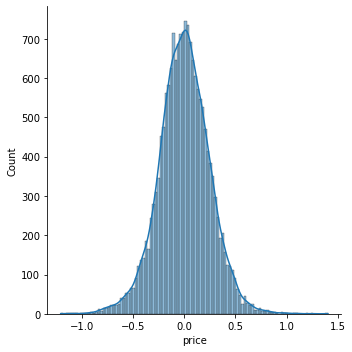

In [167]:
sns.displot(x= train_residuals, kind = 'hist', kde = True)

In [ ]:
sns.displot(x= test_residuals, kind = 'hist', kde = True)
